<div class="alert alert-block alert-info">
<H2> Notebook Instructions </H2><BR>
1. Press <mark>Shift</mark> + <mark>Enter</mark> to run the cells.<BR>
2. All the Jupyter notebook and data files can be downloaded from the LMS. Please prefix your query with <mark>Support</mark> if you are facing issues in locating the files. If you are watching offline, then reach out to your support manager at <mark>support@quantinsti.com.</mark><BR>
3. If you are new to Jupyter notebook, then read <a href= "https://blog.quantinsti.com/jupyter-notebook-tutorial-installation-components-magic-commands/">this guide</a>.
</div>

## Step 1: Data Setup

In [1]:
import warnings
warnings.simplefilter("ignore")
# Define period of backtesting
from datetime import date
start_date = date(2017,1,1)
end_date = date(2021,6,18)

# Define instrument name
instrument_name = 'LICHSGFIN.NS'

In [2]:
# Fetch Data
from data import get_stock_data
data = get_stock_data(instrument_name,start_date,end_date)
len(data)

[*********************100%***********************]  1 of 1 completed


1097

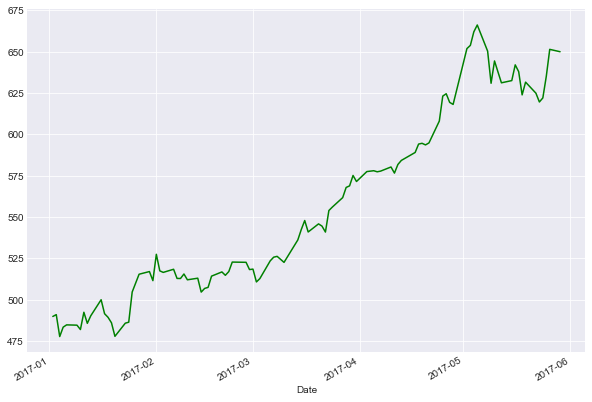

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
t = 100
data['Adj Close'][:t].plot(figsize=(10,7),color='green')
plt.show()

## Step 2: Defining Alphas

In [4]:
# Alpha 1: MA Cross-Over
from alpha import ma_crossover
import numpy as np
short_lookback = 2
long_lookback = 7

data = ma_crossover(data, short_lookback, long_lookback)

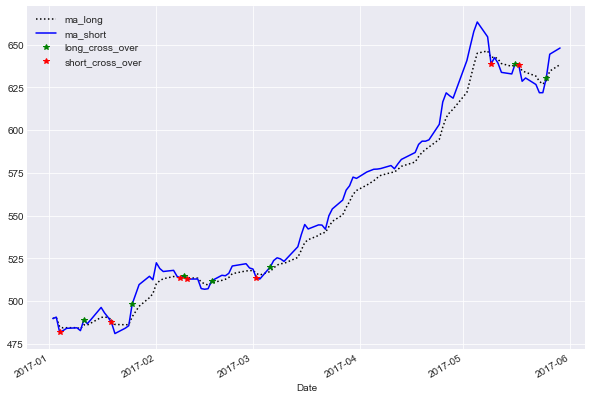

In [5]:
data.ma_long[:t].plot(figsize=(10, 7),style='k:')
data.ma_short[:t].plot(figsize=(10, 7),color='blue')
data['long_cross_over'] = np.where((data.ma_short >= data.ma_long) & (data.ma_short.shift(
    1) < data.ma_long.shift(1)), data.ma_short, np.nan)
data.long_cross_over[:t].plot(style=['g*'], figsize=(10, 7))

data['short_cross_over'] = np.where((data.ma_short <= data.ma_long) & (data.ma_short.shift(
    1) > data.ma_long.shift(1)), data.ma_short, np.nan)
data.short_cross_over[:t].plot(style=['r*'], figsize=(10, 7))

plt.legend()
plt.show()

## Step 3: Analyzing Performance

### Define final signal

In [6]:
#data = data.dropna()
data['signal'] = data['ma_signal']

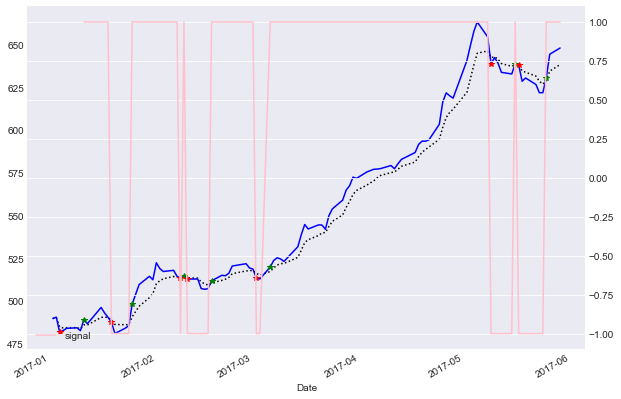

In [7]:
x = 100
data.ma_long[:t].plot(figsize=(10, 7),style='k:')
data.ma_short[:t].plot(figsize=(10, 7),color='blue')
data['long_cross_over'] = np.where((data.ma_short >= data.ma_long) & (data.ma_short.shift(
    1) < data.ma_long.shift(1)), data.ma_short, np.nan)
data.long_cross_over[:t].plot(style=['g*'], figsize=(10, 7))

data['short_cross_over'] = np.where((data.ma_short <= data.ma_long) & (data.ma_short.shift(
    1) > data.ma_long.shift(1)), data.ma_short, np.nan)
data.short_cross_over[:t].plot(style=['r*'], figsize=(10, 7))

data.signal[:t].plot(figsize=(10, 7),secondary_y=True,style='pink')

plt.legend()
plt.show()

### Compute daily returns

In [8]:
from performance_analytics import compute_ret
data = compute_ret(data)

### Daily strategy returns histogram

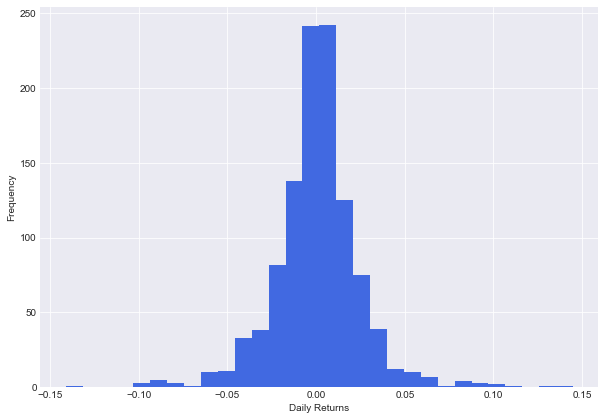

In [9]:
data.strategy_ret.hist(bins=30,figsize=(10,7),color='royalblue')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

### Cumulative strategy returns

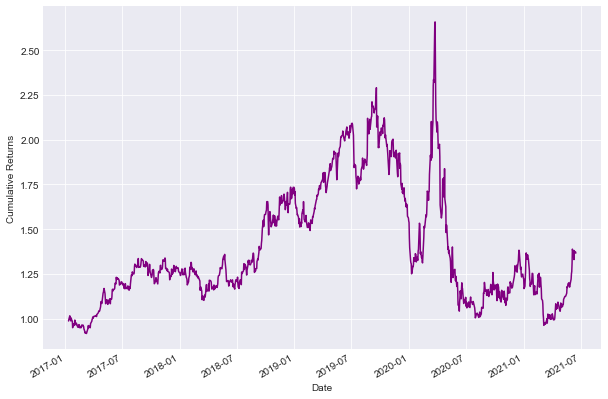

In [10]:
(data.strategy_ret + 1.0).cumprod().plot(figsize=(10,7),color='purple')
plt.ylabel('Cumulative Returns')
plt.show()

## Performance Analysis

Start date,2017-01-02
End date,2021-06-15
Total months,52
,Backtest
Annual return,7.4%
Cumulative returns,36.6%
Annual volatility,39.6%
Sharpe ratio,0.38
Calmar ratio,0.12
Stability,0.02
Max drawdown,-63.8%


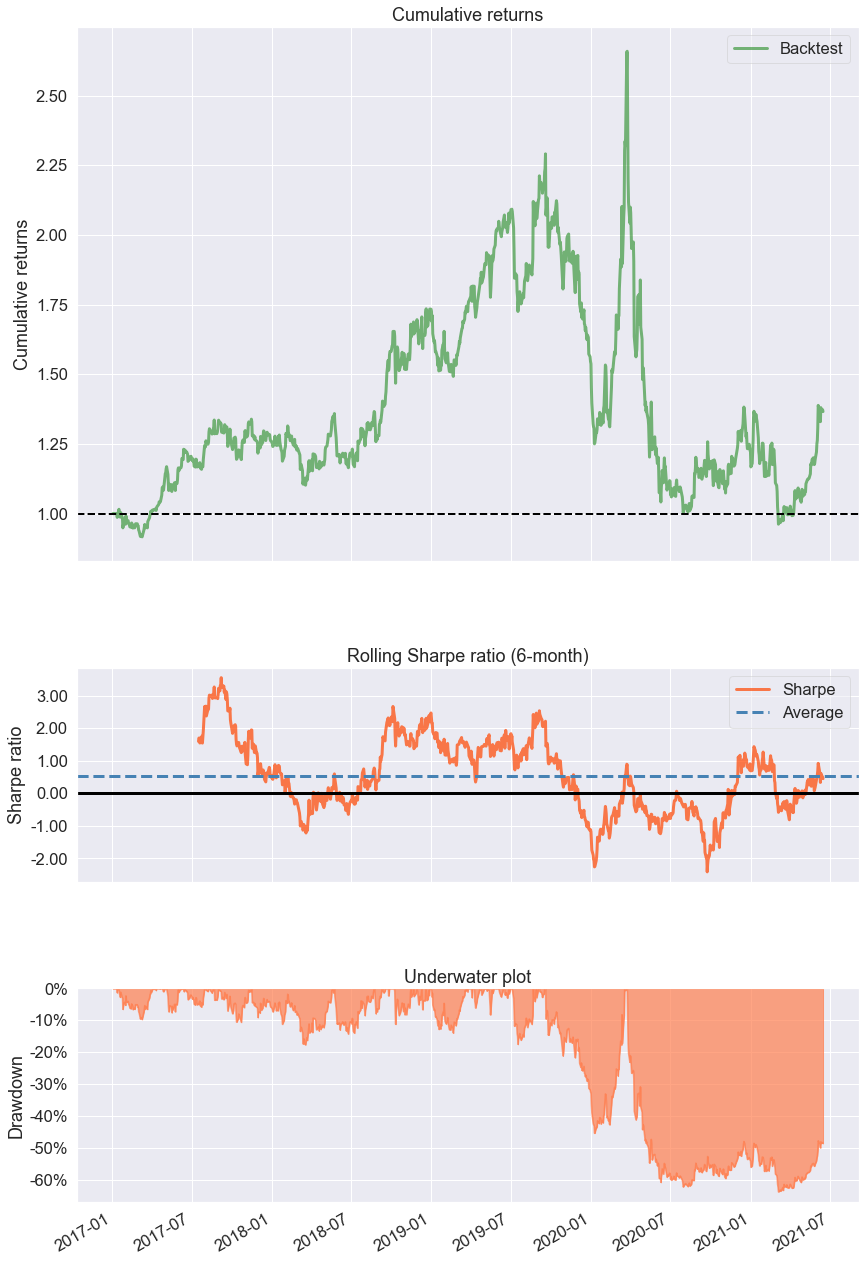

In [11]:
# Uncomment below line to install pyfolio
#!pip install pyfolio
import pyfolio as pf
pf.create_simple_tear_sheet(data.strategy_ret)

<div class="alert alert-block alert-warning">
    <b>
1. How to reduce the drawdowns?<BR>
2. How to improve the strategy performance?<BR>
        3. How to increase the Sharpe ratio?<BR>
    </b>
</div>